<a href="https://www.kaggle.com/code/monicacruzsilva/pima-indians-diabetes-notebook?scriptVersionId=181506875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Analytics libraries

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [95]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Exploratory Data Analysis (EAD)

In [96]:
# # Visualizando as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")

data.head()

Primeiras linhas do DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
# Summary statistics - numeric only
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  

* BloodPressure, Glucose, SkinThickness,Insulin, BMI  = 0 can be a outlier

In [99]:
# total de observações
data.shape[0]

768

In [100]:
# Check for missing values and data types
datadict = pd.DataFrame(data.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = data.isnull().sum()
datadict['%_Valores_Nulos'] = (data.isnull().sum() / data.shape[0]) * 100
datadict['NUnique']=data.nunique()
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
Pregnancies,int64,0,0.0,17
Glucose,int64,0,0.0,136
BloodPressure,int64,0,0.0,47
SkinThickness,int64,0,0.0,51
Insulin,int64,0,0.0,186
BMI,float64,0,0.0,248
DiabetesPedigreeFunction,float64,0,0.0,517
Age,int64,0,0.0,52
Outcome,int64,0,0.0,2


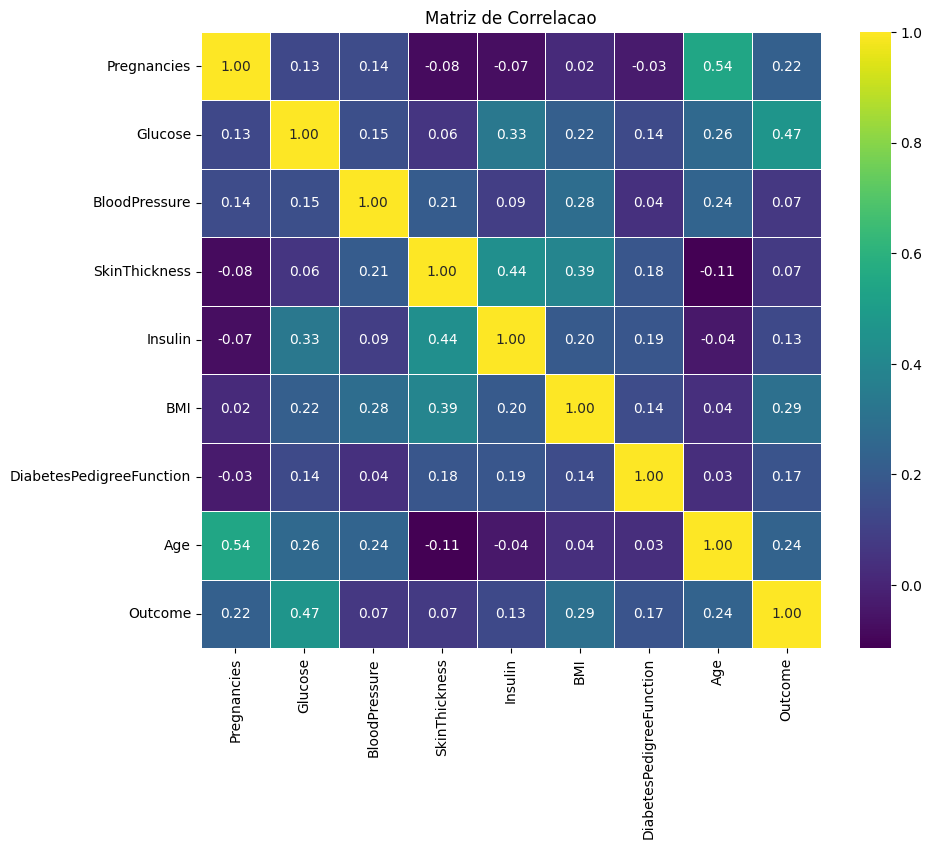

In [101]:
### seleciona variaveis numericas
num_data = data.select_dtypes(include=['float64', 'int64'])

## calcula a matriz de correlação
corr = num_data.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

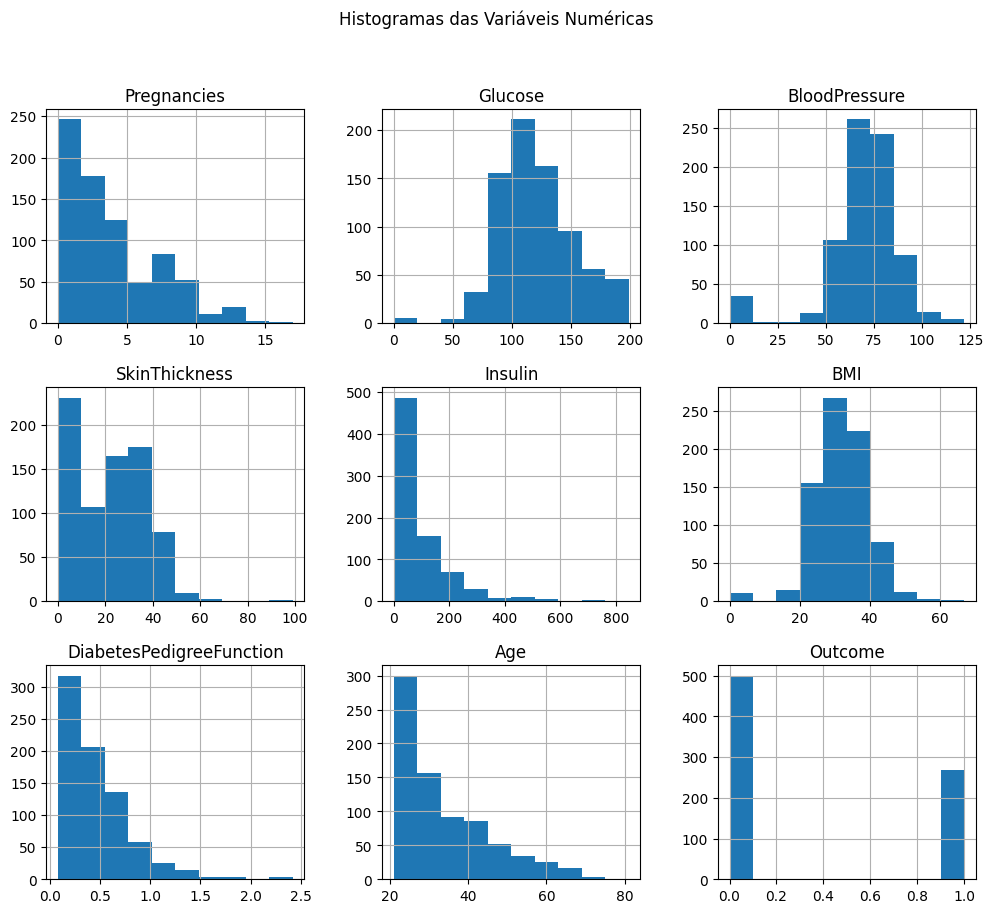

In [102]:
# Histograma das variáveis numéricas
data.hist(figsize=(12, 10))
plt.suptitle('Histogramas das Variáveis Numéricas')
plt.show()

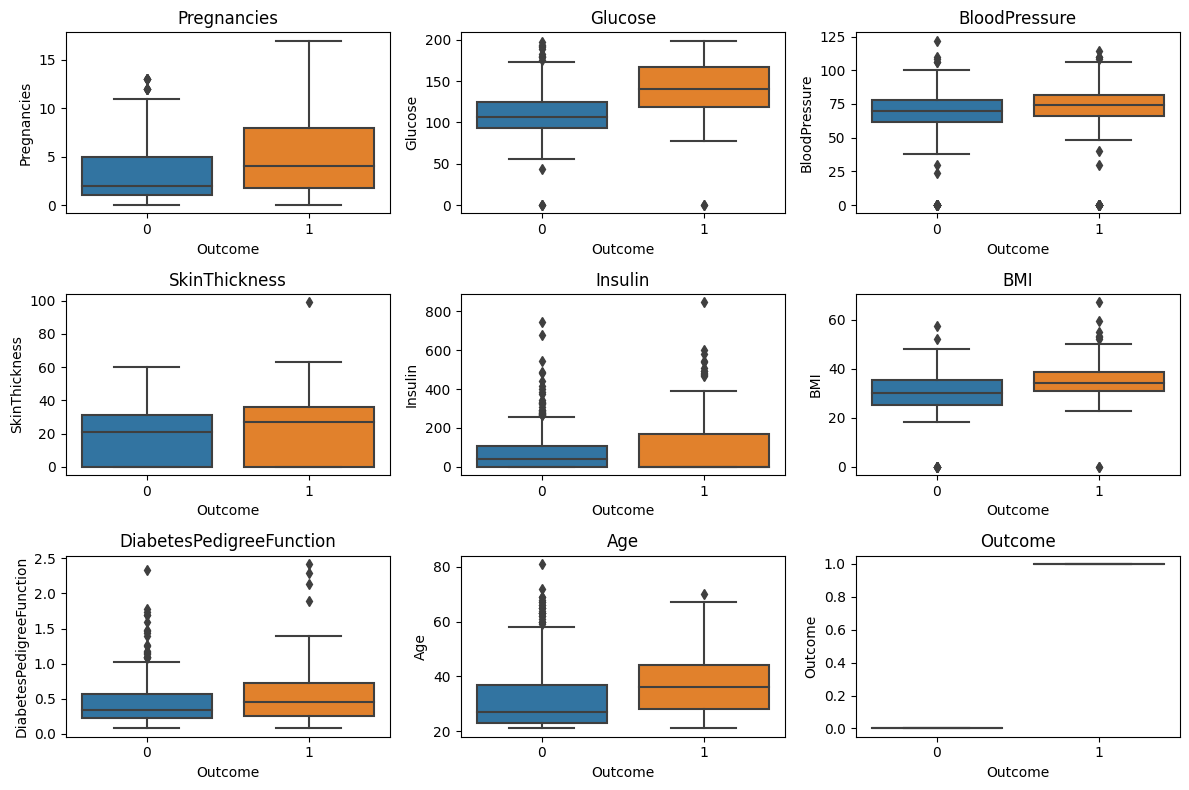

In [103]:
# Boxplot para variáveis numéricas em relação à variável alvo
plt.figure(figsize=(12, 8))

# Selecionando as variáveis numéricas
numeric_columns = data.select_dtypes(include=['int', 'float'])

for i, coluna in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data['Outcome'], y=data[coluna])
    plt.title(coluna)

plt.tight_layout()
plt.show()

# **Fitting Model**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separando os dados em features (X) e target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [105]:
# Inicializando e ajustando o modelo de regressão logística
modelo = LogisticRegression(solver='lbfgs', max_iter=200)

In [106]:
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [109]:
# Fazendo previsões no conjunto de teste
y_predict = modelo.predict(X_test)

# Accuracy Score

In [110]:
from sklearn.metrics import accuracy_score

# Calculando a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print("Precisão do modelo de regressão logística:", precisao)

Precisão do modelo de regressão logística: 0.577922077922078


# **Confusion Matrix**

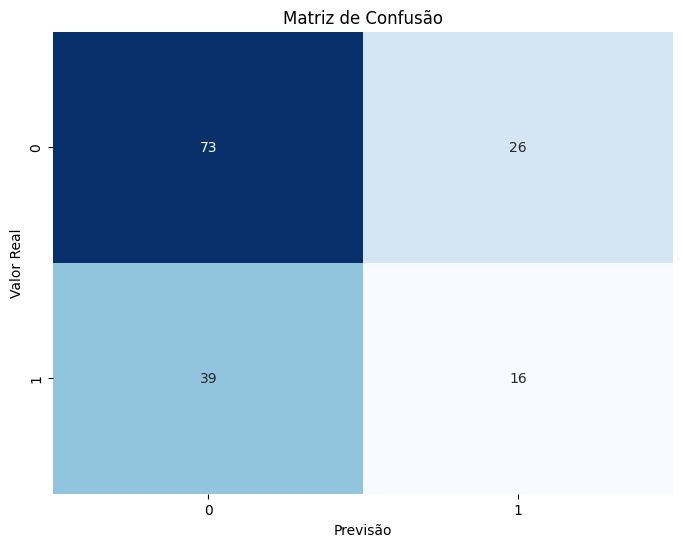

In [111]:
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# **Metrics**

In [112]:
from sklearn.metrics import classification_report

# Avaliando o modelo
relatorio_classificacao = classification_report(y_test, previsoes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69        99
           1       0.38      0.29      0.33        55

    accuracy                           0.58       154
   macro avg       0.52      0.51      0.51       154
weighted avg       0.56      0.58      0.56       154

